In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [11]:
df=pd.read_csv('student_clustering.csv')

In [12]:
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


In [13]:
#the dataset contains two columns: cgpa and iq of students

In [14]:
#we will use K-means clustering to cluster the data

In [15]:
from sklearn.cluster import KMeans

In [16]:
#we will create an array containing the wcss values

In [17]:
wcss=[]

#we will find the value of wcss for n_cluster ranging from 1 to 10
for i in range(1, 11):
    km=KMeans(n_clusters=i)
    km.fit_predict(df)  #we use the whole dataset
    wcss.append(km.inertia_)  #km.inertia_ gives the wcss values

In [18]:
wcss

[29957.898288000004,
 4184.141270000001,
 2362.713349,
 681.9696600000003,
 514.1616803171116,
 405.12058406910546,
 295.43918959431915,
 233.54082485509014,
 203.8250339428094,
 177.65597561651714]

In [19]:
#we can see the value of wcss is huge for i=1 but it reduces as i increases
#around i=4 we see an abrupt change in wcss value
#we will use the elbow method to find the best possible value for i

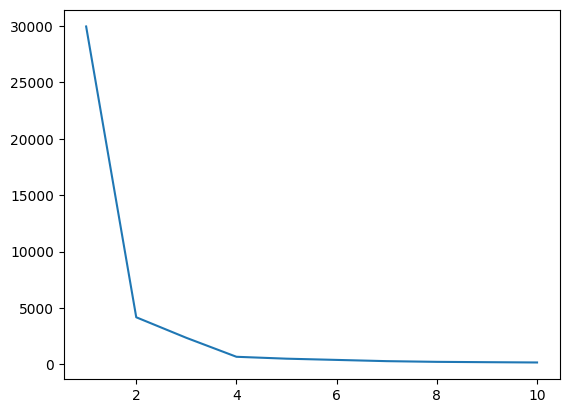

In [20]:
#we plot values from 1 to 10 against wcss values
plt.plot(range(1,11), wcss)

In [21]:
#from the above plot we can se there is an abrupt change in wcss value at k=4 
#so k=4 will be our optimal number of clusters

In [29]:
#we will take the dataset as an array so it is easier to plot the final cluster
X=df.iloc[:,:].values
km=KMeans(n_clusters=4)
y_means=km.fit_predict(X)

In [30]:
y_means

array([2, 0, 1, 1, 0, 0, 1, 3, 0, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 0, 1, 2,
       1, 2, 2, 1, 2, 3, 1, 0, 3, 0, 3, 0, 1, 1, 3, 0, 2, 0, 2, 1, 1, 2,
       3, 3, 1, 0, 3, 0, 2, 2, 3, 1, 3, 0, 0, 3, 0, 3, 0, 1, 1, 3, 2, 3,
       1, 2, 0, 1, 0, 3, 1, 2, 0, 3, 0, 3, 2, 1, 1, 3, 0, 2, 3, 2, 3, 0,
       3, 0, 3, 3, 1, 2, 1, 1, 3, 1, 2, 3, 0, 2, 2, 3, 2, 2, 1, 2, 3, 3,
       1, 3, 0, 0, 1, 3, 1, 0, 3, 2, 2, 0, 1, 3, 1, 2, 1, 0, 2, 1, 1, 0,
       2, 2, 0, 3, 0, 2, 1, 1, 1, 2, 0, 2, 2, 3, 2, 3, 0, 2, 3, 2, 3, 3,
       2, 1, 0, 3, 0, 1, 2, 3, 0, 1, 3, 2, 0, 2, 2, 3, 3, 0, 3, 2, 2, 1,
       3, 0, 2, 3, 3, 0, 0, 0, 1, 2, 1, 1, 3, 0, 1, 1, 2, 2, 1, 2, 3, 0,
       0, 3])

In [32]:
#the algorithm divides data into 4 different cluster: 0,1,2,3

In [36]:
#to access the 0th column i.e. cgpa of students who have y_means==0
X[y_means==0,0]

array([5.9 , 5.45, 5.88, 5.79, 6.1 , 5.71, 5.5 , 6.05, 5.84, 5.43, 6.01,
       5.32, 5.91, 5.57, 6.4 , 5.67, 6.05, 5.85, 5.87, 6.02, 5.77, 6.06,
       5.55, 5.81, 5.47, 5.74, 5.8 , 5.88, 5.91, 5.67, 5.74, 5.69, 6.05,
       6.14, 5.74, 5.94, 5.86, 6.38, 6.61, 6.04, 6.24, 6.1 , 5.8 , 5.87,
       5.97, 6.17, 6.01, 6.33, 5.85, 6.23])

In [37]:
#to access the 1st column i.e. iq of students who have y_means==0
X[y_means==0,1]

array([113., 110., 109., 110., 110., 108., 111., 111., 113., 106., 112.,
       106., 108., 113., 108., 109., 108., 111., 109., 104., 111., 109.,
       109., 112., 111., 109., 108., 110., 109., 111., 108., 109., 109.,
       111., 112., 109., 111., 107., 111., 110., 108., 109., 110., 108.,
       108., 110., 107., 111., 112., 108.])

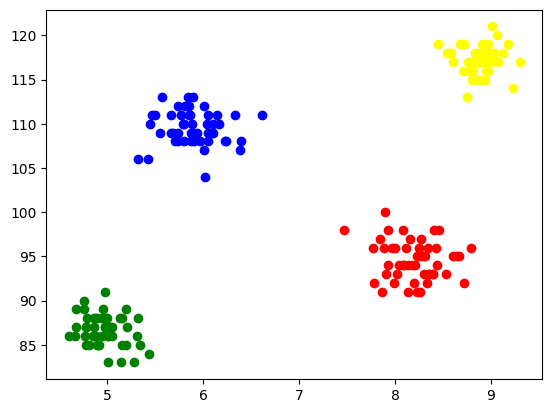

In [38]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='blue')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='red')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')

In [39]:
#we can see clearly the algorithm has formed 4 different clusters 